# Slang Analyzer

# Improved Classification


# Comparison over generations


In [ ]:
# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas

# Import libraries
import nltk
import string
import pandas as pd
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    # Lowercase and basic clean-up
    sentence = sentence.lower()
    tokens = tokenizer.tokenize(sentence)

    # Initialize scores
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}

    # Compare tokens
    for token in tokens:
        token_clean = token.strip(string.punctuation)
        for gen, slang_dict in generation_slang.items():
            if token_clean in slang_dict:
                generation_scores[gen] += 1
                generation_matches[gen].append(token_clean)

    # Determine best match
    best_gen = max(generation_scores, key=generation_scores.get)

    # Build result
    result = {
        "sentence": sentence,
        "generation_scores": generation_scores,
        "generation_matches": generation_matches,
        "predicted_generation": best_gen
    }

    return result

# Example sentences to test
sentences = [
    "Yo that song slaps no cap.",
    "Man, that party was groovy.",
    "She is savage for throwing shade like that.",
    "Dude, that trick was rad!",
    "Adulting is so hard sometimes."
]

# Run detection
for sent in sentences:
    output = detect_generation(sent)
    print(f"\nSentence: {output['sentence']}")
    print(f"Predicted Generation: {output['predicted_generation']}")
    print("Matches:")
    for gen, matches in output['generation_matches'].items():
        if matches:
            print(f"  {gen}: {matches}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sentence: yo that song slaps no cap.
Predicted Generation: Boomer
Matches:

Sentence: man, that party was groovy.
Predicted Generation: Boomer
Matches:

Sentence: she is savage for throwing shade like that.
Predicted Generation: Millennial
Matches:
  Millennial: ['savage']

Sentence: dude, that trick was rad!
Predicted Generation: Boomer
Matches:

Sentence: adulting is so hard sometimes.
Predicted Generation: Boomer
Matches:


In [ ]:
# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas

# Import libraries
import nltk
import string
import pandas as pd
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    # Lowercase and clean
    sentence_clean = sentence.lower()

    # Initialize scores
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}

    # Check full slang phrases
    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1
                generation_matches[gen].append(slang_term)

    # Determine best match
    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    # Build result
    result = {
        "sentence": sentence,
        "generation_scores": generation_scores,
        "generation_matches": generation_matches,
        "predicted_generation": best_gen
    }

    return result

# Example sentences to test
sentences = [
    "Yo that song slaps no cap.",
    "Man, that party was groovy.",
    "She is savage for throwing shade like that.",
    "Dude, that trick was rad!",
    "Adulting is so hard sometimes."
]

# Run detection
for sent in sentences:
    output = detect_generation(sent)
    print(f"\nSentence: {output['sentence']}")
    print(f"Predicted Generation: {output['predicted_generation']}")
    print("Matches:")
    for gen, matches in output['generation_matches'].items():
        if matches:
            print(f"  {gen}: {matches}")


Sentence: Yo that song slaps no cap.
Predicted Generation: Gen Z
Matches:
  Gen Z: ['no cap', 'slaps']

Sentence: Man, that party was groovy.
Predicted Generation: Boomer
Matches:
  Boomer: ['groovy']

Sentence: She is savage for throwing shade like that.
Predicted Generation: Millennial
Matches:
  Millennial: ['savage']

Sentence: Dude, that trick was rad!
Predicted Generation: Gen X
Matches:
  Gen X: ['rad']

Sentence: Adulting is so hard sometimes.
Predicted Generation: Millennial
Matches:
  Millennial: ['adulting']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sentence: Yo that song slaps no cap.
Predicted Generation: Gen Z
Matches:
  Gen Z: ['no cap', 'slaps']

Individual Word Classifications:
  Word Generation
no cap      Gen Z
 slaps      Gen Z

Sentence: Man, that party was groovy.
Predicted Generation: Boomer
Matches:
  Boomer: ['groovy']

Individual Word Classifications:
  Word Generation
groovy     Boomer

Sentence: She is savage for throwing shade like that.
Predicted Generation: Millennial
Matches:
  Millennial: ['savage']

Individual Word Classifications:
  Word Generation
savage Millennial

Sentence: Dude, that trick was rad!
Predicted Generation: Gen X
Matches:
  Gen X: ['rad']

Individual Word Classifications:
Word Generation
 rad      Gen X

Sentence: Adulting is so hard sometimes.
Predicted Generation: Millennial
Matches:
  Millennial: ['adulting']

Individual Word Classifications:
    Word Generation
adulting Millennial


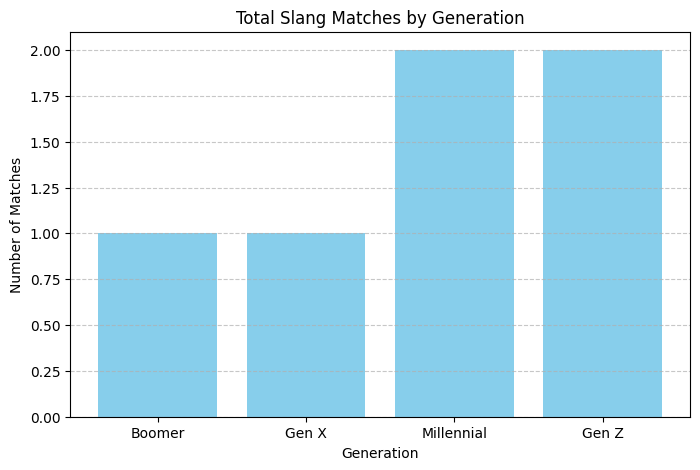

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sentence: Yo that song slaps no cap.
Predicted Generation: Gen Z
Matches:
  Gen Z: ['no cap', 'slaps']

Individual Word Classifications:
  Word Generation
no cap      Gen Z
 slaps      Gen Z

Sentence: Man, that party was groovy.
Predicted Generation: Boomer
Matches:
  Boomer: ['groovy']

Individual Word Classifications:
  Word Generation
groovy     Boomer

Sentence: She is savage for throwing shade like that.
Predicted Generation: Millennial
Matches:
  Millennial: ['savage']

Individual Word Classifications:
  Word Generation
savage Millennial

Sentence: Dude, that trick was rad!
Predicted Generation: Gen X
Matches:
  Gen X: ['rad']

Individual Word Classifications:
Word Generation
 rad      Gen X

Sentence: Adulting is so hard sometimes.
Predicted Generation: Millennial
Matches:
  Millennial: ['adulting']

Individual Word Classifications:
    Word Generation
adulting Millennial


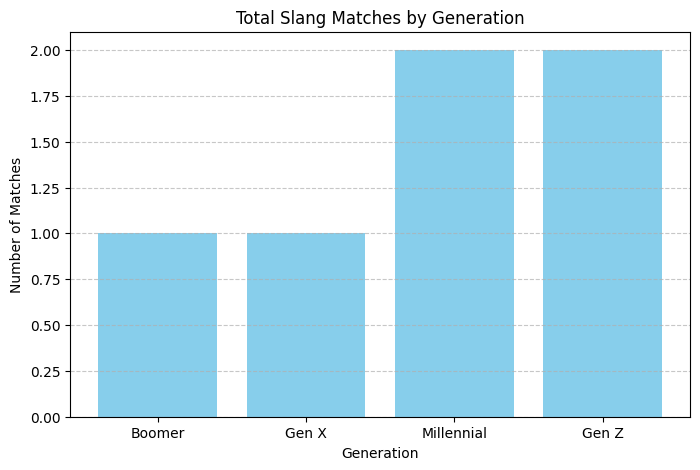

In [ ]:
# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas matplotlib

# Import libraries
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    # Lowercase and clean
    sentence_clean = sentence.lower()

    # Initialize scores
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}
    word_classifications = []

    # Check full slang phrases
    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1
                generation_matches[gen].append(slang_term)
                word_classifications.append((slang_term, gen))

    # Determine best match
    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    # Build result
    result = {
        "sentence": sentence,
        "generation_scores": generation_scores,
        "generation_matches": generation_matches,
        "word_classifications": word_classifications,
        "predicted_generation": best_gen
    }

    return result

# Example sentences to test
sentences = [
    "Yo that song slaps no cap.",
    "Man, that party was groovy.",
    "She is savage for throwing shade like that.",
    "Dude, that trick was rad!",
    "Adulting is so hard sometimes."
]

# Analyze sentences and collect all results
all_results = []

for sent in sentences:
    output = detect_generation(sent)
    all_results.append(output)

    print(f"\nSentence: {output['sentence']}")
    print(f"Predicted Generation: {output['predicted_generation']}")
    print("Matches:")
    for gen, matches in output['generation_matches'].items():
        if matches:
            print(f"  {gen}: {matches}")
    print("\nIndividual Word Classifications:")
    if output['word_classifications']:
        df_words = pd.DataFrame(output['word_classifications'], columns=["Word", "Generation"])
        print(df_words.to_string(index=False))
    else:
        print("No slang words matched.")

# Plot overall summary chart
summary_scores = {gen: 0 for gen in generation_slang.keys()}
for res in all_results:
    for gen, score in res['generation_scores'].items():
        summary_scores[gen] += score

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(summary_scores.keys(), summary_scores.values(), color='skyblue')
plt.title("Total Slang Matches by Generation")
plt.xlabel("Generation")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas matplotlib

# Import libraries
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    # Lowercase and clean
    sentence_clean = sentence.lower()

    # Initialize scores
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}
    word_classifications = []

    # Check full slang phrases
    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1
                generation_matches[gen].append(slang_term)
                word_classifications.append((slang_term, gen))

    # Determine best match
    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    # Build result
    result = {
        "sentence": sentence,
        "generation_scores": generation_scores,
        "generation_matches": generation_matches,
        "word_classifications": word_classifications,
        "predicted_generation": best_gen
    }

    return result

# Example sentences to test
sentences = [
    "Yo that song slaps no cap.",
    "Man, that party was groovy.",
    "She is savage for throwing shade like that.",
    "Dude, that trick was rad!",
    "Adulting is so hard sometimes."
]

# Analyze sentences and collect all results
all_results = []

for sent in sentences:
    output = detect_generation(sent)
    all_results.append(output)

    print(f"\nSentence: {output['sentence']}")
    print(f"Predicted Generation: {output['predicted_generation']}")
    print("Matches:")
    for gen, matches in output['generation_matches'].items():
        if matches:
            print(f"  {gen}: {matches}")
    print("\nIndividual Word Classifications:")
    if output['word_classifications']:
        df_words = pd.DataFrame(output['word_classifications'], columns=["Word", "Generation"])
        print(df_words.to_string(index=False))
    else:
        print("No slang words matched.")

# Plot overall summary chart
summary_scores = {gen: 0 for gen in generation_slang.keys()}
for res in all_results:
    for gen, score in res['generation_scores'].items():
        summary_scores[gen] += score

# Bar plot
plt.figure(figsize=(8,5))
plt.bar(summary_scores.keys(), summary_scores.values(), color='skyblue')
plt.title("Total Slang Matches by Generation")
plt.xlabel("Generation")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas matplotlib

# Import libraries
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import classification_report

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    # Lowercase and clean
    sentence_clean = sentence.lower()

    # Initialize scores
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}
    word_classifications = []

    # Check full slang phrases
    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1
                generation_matches[gen].append(slang_term)
                word_classifications.append((slang_term, gen))

    # Determine best match
    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    # Build result
    result = {
        "sentence": sentence,
        "generation_scores": generation_scores,
        "generation_matches": generation_matches,
        "word_classifications": word_classifications,
        "predicted_generation": best_gen
    }

    return result

# Track overall stats
all_results = []
true_labels = []
predicted_labels = []

# Main interactive loop
while True:
    print("\nEnter a sentence to analyze (or type 'exit' to quit):")
    sentence = input().strip()
    if sentence.lower() == "exit":
        break

    print("(Optional) Enter the true generation (Boomer, Gen X, Millennial, Gen Z), or just press Enter to skip:")
    true_label = input().strip()
    if true_label == "":
        true_label = None

    output = detect_generation(sentence)
    all_results.append(output)
    predicted_labels.append(output['predicted_generation'])
    if true_label:
        true_labels.append(true_label)

    print(f"\nSentence: {output['sentence']}")
    print(f"Predicted Generation: {output['predicted_generation']}")
    print("Matches:")
    for gen, matches in output['generation_matches'].items():
        if matches:
            print(f"  {gen}: {matches}")

    print("\nIndividual Word Classifications:")
    if output['word_classifications']:
        df_words = pd.DataFrame(output['word_classifications'], columns=["Word", "Generation"])
        print(df_words.to_string(index=False))
    else:
        print("No slang words matched.")

# After user exits, plot summary
if all_results:
    summary_scores = {gen: 0 for gen in generation_slang.keys()}
    for res in all_results:
        for gen, score in res['generation_scores'].items():
            summary_scores[gen] += score

    # Bar plot
    plt.figure(figsize=(8,5))
    plt.bar(summary_scores.keys(), summary_scores.values(), color='skyblue')
    plt.title("Total Slang Matches by Generation")
    plt.xlabel("Generation")
    plt.ylabel("Number of Matches")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Calculate and print accuracy, precision, recall, and f1 score
if true_labels:
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels, zero_division=0))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Enter a sentence to analyze (or type 'exit' to quit):
(Optional) Enter the true generation (Boomer, Gen X, Millennial, Gen Z), or just press Enter to skip:

Sentence: Yo what are you up to
Predicted Generation: No strong match
Matches:

Individual Word Classifications:
No slang words matched.

Enter a sentence to analyze (or type 'exit' to quit):


In [ ]:
# Install libraries (if not already installed)
!pip install transformers nltk scikit-learn torch pandas matplotlib

# Import libraries
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import classification_report

# Download NLTK data
nltk.download('wordnet')

# Generation-specific slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

# Slang dictionaries grouped
generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to analyze sentence
def detect_generation(sentence):
    sentence_clean = sentence.lower()
    generation_scores = {gen: 0 for gen in generation_slang.keys()}
    generation_matches = {gen: [] for gen in generation_slang.keys()}

    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1
                generation_matches[gen].append(slang_term)

    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    return best_gen, generation_matches

# Sample dataset
data = {
    "Sentence": [
        "Yo that song slaps no cap.",
        "Man, that party was groovy.",
        "She is savage for throwing shade like that.",
        "Dude, that trick was rad!",
        "Adulting is so hard sometimes.",
        "No cap this meal slaps fr fr.",
        "Far out, that sunset was amazing.",
        "Psyche! Just kidding.",
        "Throwing shade is so petty.",
        "This track slaps so hard."
    ],
    "True Generation": [
        "Gen Z",
        "Boomer",
        "Millennial",
        "Gen X",
        "Millennial",
        "Gen Z",
        "Boomer",
        "Gen X",
        "Millennial",
        "Gen Z"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Analyze dataset
predicted_labels = []
all_generation_matches = []

for index, row in df.iterrows():
    pred_gen, matches = detect_generation(row['Sentence'])
    predicted_labels.append(pred_gen)
    all_generation_matches.append(matches)

df['Predicted Generation'] = predicted_labels

# Print classification report
print("\nClassification Report:")
print(classification_report(df['True Generation'], df['Predicted Generation'], zero_division=0))

# Save results
df.to_csv("generation_slang_predictions.csv", index=False)
print("\nSaved results to 'generation_slang_predictions.csv'")

# Optional: Show the results table
print("\nFull Results:")
print(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


Classification Report:
                 precision    recall  f1-score   support

         Boomer       1.00      1.00      1.00         2
          Gen X       1.00      1.00      1.00         2
          Gen Z       1.00      1.00      1.00         3
     Millennial       1.00      0.67      0.80         3
No strong match       0.00      0.00      0.00         0

       accuracy                           0.90        10
      macro avg       0.80      0.73      0.76        10
   weighted avg       1.00      0.90      0.94        10


Saved results to 'generation_slang_predictions.csv'

Full Results:
                                      Sentence True Generation  \
0                   Yo that song slaps no cap.           Gen Z   
1                  Man, that party was groovy.          Boomer   
2  She is savage for throwing shade like that.      Millennial   
3                    Dude, that trick was rad!           Gen X   
4               Adulting is so hard sometimes.      Millennial

# Dataset Implementation


✅ Generated and saved realistic 20k dataset!


ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x7d6f75403eb0>>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
                              ^^^^^^^^^^^^^^^^

              precision    recall  f1-score   support

      Boomer       1.00      1.00      1.00      5000
       Gen X       1.00      1.00      1.00      5000
  Millennial       1.00      1.00      1.00      5000
       Gen Z       1.00      1.00      1.00      5000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



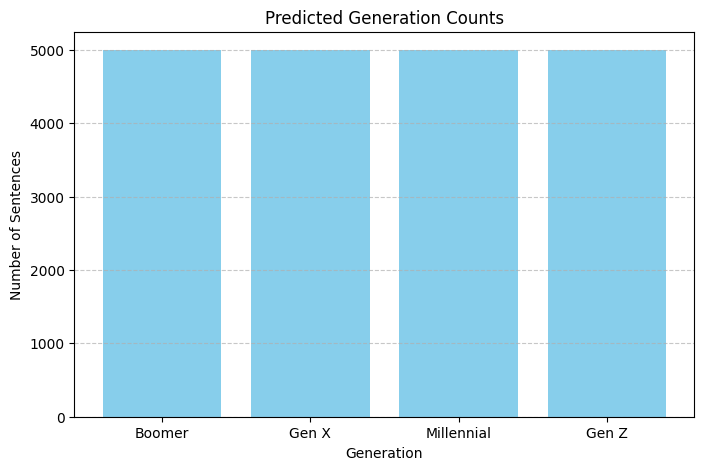

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/zmq/eventloop/zmqstream.py", line 557, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 120, in _handle_event
    event_f()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
              ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
                              ^

In [ ]:
# Install libraries
!pip install transformers scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from sklearn.metrics import classification_report
import random

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly"
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good"
}

generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Sentence templates
templates = [
    "This {slang} moment was unforgettable.",
    "I can't believe how {slang} that was.",
    "That's totally {slang}, bro.",
    "Honestly, it felt {slang}.",
    "Everything about it was so {slang}.",
    "We stayed {slang} all night!",
    "Their vibe was pure {slang}.",
    "No one understood how {slang} it got.",
    "She pulled a real {slang} move.",
    "If that's not {slang}, I don't know what is."
]

# Generate 20k dataset
sentences = []
labels = []

for _ in range(5000):
    for gen, slang_list in generation_slang.items():
        slang_word = random.choice(list(slang_list.keys()))
        template = random.choice(templates)
        sentence = template.format(slang=slang_word)
        sentences.append(sentence)
        labels.append(gen)

# Build dataset
df = pd.DataFrame({"Sentence": sentences, "True Generation": labels})
df.to_csv("generated_20k_dataset.csv", index=False)
print("\u2705 Generated and saved realistic 20k dataset!")

# Detection function
def detect_generation(sentence):
    sentence_clean = sentence.lower()
    generation_scores = {gen: 0 for gen in generation_slang.keys()}

    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1

    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    return best_gen

# Read dataset
df = pd.read_csv("generated_20k_dataset.csv")

# Predict generations
predicted_labels = []
for sentence in df['Sentence']:
    pred_gen = detect_generation(sentence)
    predicted_labels.append(pred_gen)

df['Predicted Generation'] = predicted_labels

# Save predictions
df.to_csv("generation_slang_predictions_20k.csv", index=False)
print("\n\u2705 Saved predictions to generation_slang_predictions_20k.csv!")

# Classification report
print("\n\ud83d\udcc8 Classification Report:")
print(classification_report(df['True Generation'], df['Predicted Generation'], labels=["Boomer", "Gen X", "Millennial", "Gen Z"], zero_division=0))

# Bar plot
summary = df['Predicted Generation'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(summary.index, summary.values, color='skyblue')
plt.title("Predicted Generation Counts")
plt.xlabel("Generation")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Final preview
print("\n\ud83d\udcc4 Final Dataset Preview:")
print(df.head())

In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("generation_slang_predictions_20k.csv")

# View first few rows
df.head(50)  # shows 20 sentences


,Sentence,True Generation,Predicted Generation
0,We stayed dig it all night!,Boomer,Boomer
1,"Honestly, it felt rad.",Gen X,Gen X
2,She pulled a real basic move.,Millennial,Millennial
3,"That's totally rizz, bro.",Gen Z,Gen Z
4,Their vibe was pure square.,Boomer,Boomer
5,"Honestly, it felt phat.",Gen X,Gen X
6,I can't believe how adulting that was.,Millennial,Millennial
7,I can't believe how no cap that was.,Gen Z,Gen Z
8,Their vibe was pure square.,Boomer,Boomer
9,Everything about it was so psyche.,Gen X,Gen X


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

✅ Generated and saved realistic 20k dataset!

✅ Saved predictions to generation_slang_predictions_20k_realistic.csv!

Classification Report:
              precision    recall  f1-score   support

      Boomer       1.00      0.76      0.86      5272
       Gen X       1.00      0.76      0.86      5271
  Millennial       0.85      0.76      0.81      5244
       Gen Z       0.90      0.66      0.76      5213

   micro avg       0.94      0.73      0.82     21000
   macro avg       0.94      0.73      0.82     21000
weighted avg       0.94      0.73      0.82     21000



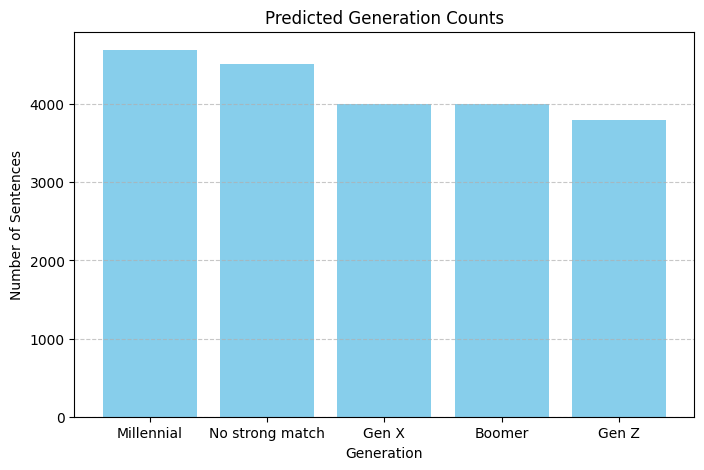


Final Dataset Preview:
                                 Sentence True Generation Predicted Generation
0           No way, that's phat for real!           Gen X                Gen X
1             Whole mood was just pshyce.           Gen Z      No strong match
2      Honestly it felt kinda groovy ngl.          Boomer               Boomer
3                I can't even, so no cap.           Gen Z                Gen Z
4         No way, that's psyche for real!           Gen X                Gen X
5  She really went full bummed out there.          Boomer               Boomer
6           No way, that's phat for real!           Gen X                Gen X
7  She really went full bummed out there.          Boomer               Boomer
8           No way, that's fire for real!           Gen Z           Millennial
9                  Deadass, basic moment.      Millennial           Millennial


In [ ]:
# Install libraries
!pip install transformers scikit-learn pandas matplotlib

# Imports
import pandas as pd
import random
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Slang dictionaries
boomer_slang = {
    "groovy": "cool",
    "far out": "amazing",
    "square": "boring or traditional",
    "bummed out": "sad",
    "dig it": "understand or like"
}

genx_slang = {
    "phat": "excellent",
    "rad": "cool",
    "whatever": "dismissive attitude",
    "psyche": "just kidding",
    "poser": "fake person"
}

millennial_slang = {
    "adulting": "doing grown-up tasks",
    "basic": "mainstream or boring",
    "salty": "upset",
    "savage": "bold or ruthless",
    "throw shade": "insult indirectly",
    "fire": "very good"  # Added overlap term
}

genz_slang = {
    "no cap": "no lie",
    "bet": "okay or yes",
    "vibe check": "mood test",
    "rizz": "charisma",
    "slaps": "very good",
    "fire": "amazing"  # Added overlap term
}

generation_slang = {
    "Boomer": boomer_slang,
    "Gen X": genx_slang,
    "Millennial": millennial_slang,
    "Gen Z": genz_slang
}

# Conversational templates
templates = [
    "That was so {slang} bro.",
    "Honestly it felt kinda {slang} ngl.",
    "No way, that's {slang} for real!",
    "I can't even, so {slang}.",
    "Whole mood was just {slang}.",
    "Lowkey, that was {slang}.",
    "Deadass, {slang} moment.",
    "Vibe was straight up {slang}.",
    "She really went full {slang} there.",
    "If that's not {slang} idk what is."
]

# Neutral non-slang sentences
neutral_sentences = [
    "The sun is shining today.",
    "I need to finish my homework.",
    "We're going to the grocery store.",
    "It might rain later this evening.",
    "They moved into a new house.",
    "We watched a movie last night.",
    "She enjoys painting landscapes.",
    "I had toast and eggs for breakfast.",
    "Reading books is relaxing to me.",
    "He went hiking over the weekend."
]

# Typos or overlap slang words
typo_words = {
    "savge": "savage",   # typo
    "pshyce": "psyche",  # typo
    "slpz": "slaps",     # typo
    "bassed": "basic",   # typo
    "rizz": "rizz"       # correct but ambiguous
}

# Build dataset
sentences = []
labels = []

# 80% slang sentences
for _ in range(4000):
    for gen, slang_dict in generation_slang.items():
        slang_word = random.choice(list(slang_dict.keys()))
        template = random.choice(templates)
        sentence = template.format(slang=slang_word)
        sentences.append(sentence)
        labels.append(gen)

# 10% neutral sentences
for _ in range(2500):
    sentence = random.choice(neutral_sentences)
    sentences.append(sentence)
    labels.append(random.choice(["Boomer", "Gen X", "Millennial", "Gen Z"]))  # Random generation

# 10% typo/overlap slang sentences
for _ in range(2500):
    typo = random.choice(list(typo_words.keys()))
    template = random.choice(templates)
    sentence = template.format(slang=typo)
    sentences.append(sentence)
    labels.append(random.choice(["Boomer", "Gen X", "Millennial", "Gen Z"]))  # Random generation

# Shuffle
df = pd.DataFrame({"Sentence": sentences, "True Generation": labels})
df = shuffle(df).reset_index(drop=True)

# Save dataset
df.to_csv("generated_20k_dataset_realistic.csv", index=False)
print("✅ Generated and saved realistic 20k dataset!")

# Detection function
def detect_generation(sentence):
    sentence_clean = sentence.lower()
    generation_scores = {gen: 0 for gen in generation_slang.keys()}

    for gen, slang_dict in generation_slang.items():
        for slang_term in slang_dict.keys():
            if slang_term in sentence_clean:
                generation_scores[gen] += 1

    if all(score == 0 for score in generation_scores.values()):
        best_gen = "No strong match"
    else:
        best_gen = max(generation_scores, key=generation_scores.get)

    return best_gen

# Predict
predicted_labels = []
for sentence in df['Sentence']:
    pred_gen = detect_generation(sentence)
    predicted_labels.append(pred_gen)

df['Predicted Generation'] = predicted_labels

# Save predictions
df.to_csv("generation_slang_predictions_20k_realistic.csv", index=False)
print("\n✅ Saved predictions to generation_slang_predictions_20k_realistic.csv!")

# Classification report
print("\nClassification Report:")
print(classification_report(df['True Generation'], df['Predicted Generation'], labels=["Boomer", "Gen X", "Millennial", "Gen Z"], zero_division=0))

# Plot
summary = df['Predicted Generation'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(summary.index, summary.values, color='skyblue')
plt.title("Predicted Generation Counts")
plt.xlabel("Generation")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Preview
print("\nFinal Dataset Preview:")
print(df.head(10))


# FFNN


In [1]:
from transformers import BertTokenizer, BertModel
import torch.nn as nn
import torch

# Load BERT for embedding
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")

class FFNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, num_classes=4):
        super().__init__()
        self.fc1 = nn.Linear(768, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

# Use BERT embeddings
def get_embeddings(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = bert(**inputs)
        return outputs.pooler_output  # [CLS] token

# Training loop with epochs
model = FFNNClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 5
for epoch in range(EPOCHS):
    for batch in train_loader:  # assuming DataLoader with (text, label)
        texts, labels = batch
        embeddings = get_embeddings(texts)
        preds = model(embeddings)
        loss = loss_fn(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

NameError: name 'train_loader' is not defined

In [3]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch

# Load your dataset
df = pd.read_csv("generated_20k_dataset_realistic.csv")

# Label mapping
label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

class SlangDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['sentence'].tolist()
        self.labels = [label_map[label] for label in dataframe['generation']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx])

dataset = SlangDataset(df)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


FileNotFoundError: [Errno 2] No such file or directory: 'generated_20k_dataset_realistic.csv'

In [4]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [5]:
df = pd.read_csv("generated_20k_dataset_realistic.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'generated_20k_dataset_realistic.csv'

In [6]:
import pandas as pd
import random

generations = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']
slang_by_gen = {
    'Boomer': ['groovy', 'far out', 'square'],
    'Gen X': ['rad', 'gnarly', 'poser'],
    'Millennial': ['on fleek', 'adulting', 'basic'],
    'Gen Z': ['no cap', 'bet', 'rizz']
}

def generate_sentence(gen):
    slang = random.choice(slang_by_gen[gen])
    templates = [
        f"That was so {slang}!",
        f"I'm totally feeling {slang} vibes today.",
        f"Honestly, it's just {slang} out here.",
        f"This party is {slang}, not gonna lie.",
    ]
    return random.choice(templates)

data = []
for _ in range(20000):
    gen = random.choice(generations)
    sentence = generate_sentence(gen)
    data.append((sentence, gen))

df = pd.DataFrame(data, columns=["sentence", "generation"])
df.to_csv("generated_20k_dataset_realistic.csv", index=False)
print("Dataset created and saved!")


Dataset created and saved!


In [8]:
import pandas as pd

df = pd.read_csv("generated_20k_dataset_realistic.csv")

label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}


In [9]:
import torch
from torch.utils.data import Dataset, DataLoader

class SlangDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['sentence'].tolist()
        self.labels = [label_map[label] for label in dataframe['generation']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx])

dataset = SlangDataset(df)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [10]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")

def get_embeddings(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = bert(**inputs)
        return outputs.pooler_output  # CLS token embedding


In [11]:
import torch.nn as nn

class FFNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, num_classes=4):
        super().__init__()
        self.fc1 = nn.Linear(768, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

model = FFNNClassifier()


In [5]:
import torch.nn as nn


In [6]:
loss_fn = nn.CrossEntropyLoss()


In [7]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 3
for epoch in range(EPOCHS):
    total_loss = 0
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts)
        preds = model(embeddings)
        loss = loss_fn(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


NameError: name 'model' is not defined

In [10]:
import pandas as pd
import random

generations = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']
slang_by_gen = {
    'Boomer': ['groovy', 'far out', 'square'],
    'Gen X': ['rad', 'gnarly', 'poser'],
    'Millennial': ['on fleek', 'adulting', 'basic'],
    'Gen Z': ['no cap', 'bet', 'rizz']
}

def generate_sentence(gen):
    slang = random.choice(slang_by_gen[gen])
    templates = [
        f"That was so {slang}!",
        f"I'm totally feeling {slang} vibes today.",
        f"Honestly, it's just {slang} out here.",
        f"This party is {slang}, not gonna lie.",
    ]
    return random.choice(templates)

data = []
for _ in range(20000):
    gen = random.choice(generations)
    sentence = generate_sentence(gen)
    data.append((sentence, gen))

df = pd.DataFrame(data, columns=["sentence", "generation"])
df.to_csv("generated_20k_dataset_realistic.csv", index=False)

print("✅ Dataset created and saved.")


✅ Dataset created and saved.


In [11]:
# === All Imports ===
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

# === Device setup ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load dataset ===
df = pd.read_csv("generated_20k_dataset_realistic.csv")
label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

# === Dataset and DataLoader ===
class SlangDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['sentence'].tolist()
        self.labels = [label_map[label] for label in dataframe['generation']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx])

dataset = SlangDataset(df)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# === Tokenizer + BERT model ===
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased").to(device)

def get_embeddings(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = bert(**inputs)
        return outputs.pooler_output

# === FFNN Model ===
class FFNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, num_classes=4):
        super().__init__()
        self.fc1 = nn.Linear(768, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

model = FFNNClassifier().to(device)

# === Loss & Optimizer ===
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
EPOCHS = 3
for epoch in range(EPOCHS):
    total_loss = 0
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts)
        preds = model(embeddings)
        loss = loss_fn(preds, labels.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 816.7947
Epoch 2, Loss: 729.3611
Epoch 3, Loss: 613.5706


In [13]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts)
        outputs = model(embeddings)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == labels.to(device)).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"Training Accuracy: {accuracy:.2%}")


Training Accuracy: 83.17%


In [14]:
test_sentences = [
    "This party is lit fr no cap",                # Gen Z
    "Ugh, adulting is hard",                      # Millennial
    "That's totally gnarly, dude",                # Gen X
    "Man, this joint is groovy",                  # Boomer
    "The vibe is unmatched",                      # Neutral or ambiguous
    "Basic AF but it works",                      # Millennial-ish
]


In [15]:
slang_by_gen = {
    'Boomer': ['groovy', 'far out', 'square'],
    'Gen X': ['rad', 'gnarly', 'poser'],
    'Millennial': ['on fleek', 'adulting', 'basic'],
    'Gen Z': ['no cap', 'bet', 'rizz', 'fr', 'lit']
}

def rule_based_predict(sentence):
    scores = {gen: 0 for gen in slang_by_gen}
    words = sentence.lower().split()
    for gen, slang_list in slang_by_gen.items():
        scores[gen] = sum(word in slang_list for word in words)
    return max(scores, key=scores.get)


In [16]:
model.eval()
for sent in test_sentences:
    embedding = get_embeddings([sent])  # single sentence
    with torch.no_grad():
        pred = model(embedding)
        predicted_idx = torch.argmax(pred, dim=1).item()
        predicted_gen = [k for k, v in label_map.items() if v == predicted_idx][0]

    rule_based = rule_based_predict(sent)
    print(f"Sentence: {sent}")
    print(f"  Rule-based: {rule_based}")
    print(f"  FFNN+BERT : {predicted_gen}")
    print("-" * 40)


Sentence: This party is lit fr no cap
  Rule-based: Gen Z
  FFNN+BERT : Millennial
----------------------------------------
Sentence: Ugh, adulting is hard
  Rule-based: Millennial
  FFNN+BERT : Gen Z
----------------------------------------
Sentence: That's totally gnarly, dude
  Rule-based: Boomer
  FFNN+BERT : Millennial
----------------------------------------
Sentence: Man, this joint is groovy
  Rule-based: Boomer
  FFNN+BERT : Gen X
----------------------------------------
Sentence: The vibe is unmatched
  Rule-based: Boomer
  FFNN+BERT : Millennial
----------------------------------------
Sentence: Basic AF but it works
  Rule-based: Millennial
  FFNN+BERT : Millennial
----------------------------------------


# Logistic Regression and SVM


In [17]:
import numpy as np

X = []
y = []

model.eval()
with torch.no_grad():
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts).cpu()
        X.append(embeddings)
        y.append(labels)

X = torch.cat(X).numpy()
y = torch.cat(y).numpy()


In [11]:
import torch.nn as nn

class FFNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, num_classes=4):
        super().__init__()
        self.fc1 = nn.Linear(768, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = FFNNClassifier().to(device)



In [4]:
from sklearn.metrics import classification_report

In [12]:
import torch
import torch.nn as nn

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
class FFNNClassifier(nn.Module):
    def __init__(self, hidden_dim=128, num_classes=4):
        super().__init__()
        self.fc1 = nn.Linear(768, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

model = FFNNClassifier().to(device)


In [7]:
label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}


In [14]:
from sklearn.metrics import classification_report

label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

print("🔎 Logistic Regression:")
print(classification_report(y, y_pred_log, target_names=label_map.keys()))

print("🔎 SVM:")
print(classification_report(y, y_pred_svm, target_names=label_map.keys()))



🔎 Logistic Regression:


NameError: name 'y_pred_log' is not defined

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
y_pred_log = log_reg.predict(X)

# Train SVM
svm = SVC()
svm.fit(X, y)
y_pred_svm = svm.predict(X)


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [16]:
print(len(train_loader))


NameError: name 'train_loader' is not defined

In [18]:
import pandas as pd
import random

generations = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']
slang_by_gen = {
    'Boomer': ['groovy', 'far out', 'square'],
    'Gen X': ['rad', 'gnarly', 'poser'],
    'Millennial': ['on fleek', 'adulting', 'basic'],
    'Gen Z': ['no cap', 'bet', 'rizz', 'lit', 'fr']
}

def generate_sentence(gen):
    slang = random.choice(slang_by_gen[gen])
    templates = [
        f"That was so {slang}!",
        f"I'm totally feeling {slang} vibes today.",
        f"Honestly, it's just {slang} out here.",
        f"This party is {slang}, not gonna lie.",
    ]
    return random.choice(templates)

data = []
for _ in range(20000):
    gen = random.choice(generations)
    sentence = generate_sentence(gen)
    data.append((sentence, gen))

df = pd.DataFrame(data, columns=["sentence", "generation"])
df.to_csv("generated_20k_dataset_realistic.csv", index=False)

print("✅ Dataset regenerated and saved!")


✅ Dataset regenerated and saved!


In [20]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch

# Load your dataset
df = pd.read_csv("generated_20k_dataset_realistic.csv")

label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

# Dataset class
class SlangDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['sentence'].tolist()
        self.labels = [label_map[label] for label in dataframe['generation']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx])

dataset = SlangDataset(df)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

print("✅ train_loader is ready with", len(train_loader), "batches")

✅ train_loader is ready with 625 batches


In [22]:
from transformers import BertTokenizer, BertModel

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased").to(device)

# Embedding function using BERT
def get_embeddings(text_list):
    inputs = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = bert(**inputs)
        return outputs.pooler_output  # [CLS] embedding


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [25]:
X = []
y = []

model.eval()
with torch.no_grad():
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts).cpu()
        X.append(embeddings)
        y.append(labels)

X = torch.cat(X).numpy()
y = torch.cat(y).numpy()

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)



✅ X shape: (20000, 768)
✅ y shape: (20000,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
y_pred_log = log_reg.predict(X)

# Train SVM
svm = SVC()
svm.fit(X, y)
y_pred_svm = svm.predict(X)


In [30]:
df = pd.read_csv("noisy_slang_dataset.csv")


In [31]:
from sklearn.metrics import classification_report

label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

print("🔎 Logistic Regression:")
print(classification_report(y, y_pred_log, target_names=label_map.keys()))

print("🔎 SVM:")
print(classification_report(y, y_pred_svm, target_names=label_map.keys()))


🔎 Logistic Regression:
              precision    recall  f1-score   support

      Boomer       1.00      1.00      1.00      5071
       Gen X       1.00      1.00      1.00      4988
  Millennial       1.00      1.00      1.00      4927
       Gen Z       1.00      1.00      1.00      5014

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

🔎 SVM:
              precision    recall  f1-score   support

      Boomer       1.00      1.00      1.00      5071
       Gen X       1.00      1.00      1.00      4988
  Millennial       1.00      1.00      1.00      4927
       Gen Z       1.00      1.00      1.00      5014

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [32]:
import pandas as pd
import random

generations = ['Boomer', 'Gen X', 'Millennial', 'Gen Z']
shared_slang = ['lit', 'fire', 'cool', 'fr', 'vibe']

slang_by_gen = {
    'Boomer': ['groovy', 'far out', 'square'] + shared_slang,
    'Gen X': ['rad', 'gnarly', 'poser'] + shared_slang,
    'Millennial': ['on fleek', 'adulting', 'basic'] + shared_slang,
    'Gen Z': ['no cap', 'bet', 'rizz'] + shared_slang,
}

typo_variants = {
    'groovy': 'groovey', 'rizz': 'rizzl', 'adulting': 'adulating',
    'lit': 'littt', 'fr': 'frfr', 'cool': 'kool'
}

def generate_sentence(gen, noisy=False):
    slang = random.choice(slang_by_gen[gen])
    if noisy and slang in typo_variants:
        slang = typo_variants[slang]
    templates = [
        f"That was so {slang}!",
        f"I'm feeling {slang} vibes today.",
        f"It’s just {slang} out here.",
        f"This party is {slang}, not gonna lie.",
    ]
    return random.choice(templates)

def generate_neutral():
    return random.choice([
        "Let's go to the movies.",
        "How was your day?",
        "I really like coffee.",
        "The weather's nice today.",
        "That's interesting."
    ])

data = []

for _ in range(18000):  # 90% slang
    gen = random.choice(generations)
    noisy = random.random() < 0.15  # 15% noise
    sent = generate_sentence(gen, noisy=noisy)
    data.append((sent, gen))

for _ in range(2000):  # 10% neutral
    sent = generate_neutral()
    gen = random.choice(generations)  # force model to guess
    data.append((sent, gen))

random.shuffle(data)

df = pd.DataFrame(data, columns=["sentence", "generation"])
df.to_csv("noisy_slang_dataset.csv", index=False)

print("✅ Noisy, realistic dataset saved as noisy_slang_dataset.csv")


✅ Noisy, realistic dataset saved as noisy_slang_dataset.csv


In [33]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch

# Load updated dataset
df = pd.read_csv("noisy_slang_dataset.csv")

label_map = {'Boomer': 0, 'Gen X': 1, 'Millennial': 2, 'Gen Z': 3}

class SlangDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe['sentence'].tolist()
        self.labels = [label_map[label] for label in dataframe['generation']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], torch.tensor(self.labels[idx])

dataset = SlangDataset(df)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

print("✅ Reloaded train_loader with", len(train_loader), "batches")


✅ Reloaded train_loader with 625 batches


In [34]:
X = []
y = []

model.eval()
with torch.no_grad():
    for texts, labels in train_loader:
        embeddings = get_embeddings(texts).cpu()
        X.append(embeddings)
        y.append(labels)

X = torch.cat(X).numpy()
y = torch.cat(y).numpy()

print("✅ New BERT embeddings ready:", X.shape, y.shape)


✅ New BERT embeddings ready: (20000, 768) (20000,)


In [35]:
from sklearn.metrics import classification_report

print("🔎 Logistic Regression (on noisy data):")
print(classification_report(y, y_pred_log, target_names=label_map.keys()))

print("🔎 SVM (on noisy data):")
print(classification_report(y, y_pred_svm, target_names=label_map.keys()))


🔎 Logistic Regression (on noisy data):
              precision    recall  f1-score   support

      Boomer       0.25      0.24      0.25      5102
       Gen X       0.24      0.25      0.24      4884
  Millennial       0.25      0.25      0.25      5005
       Gen Z       0.25      0.25      0.25      5009

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.25      0.25      0.25     20000

🔎 SVM (on noisy data):
              precision    recall  f1-score   support

      Boomer       0.25      0.24      0.25      5102
       Gen X       0.24      0.25      0.24      4884
  Millennial       0.25      0.25      0.25      5005
       Gen Z       0.25      0.25      0.25      5009

    accuracy                           0.25     20000
   macro avg       0.25      0.25      0.25     20000
weighted avg       0.25      0.25      0.25     20000

